<a href="https://colab.research.google.com/github/AnyaAP/ComputerGraphics/blob/main/2D_figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

n: 4
x: 20
y: 40
x: 40
y: 60
x: 60
y: 40
x: 40
y: 20
x0: 100
y0: 100
angle: 45
dx: 20
dy: 30
sx: 2
sy: 2


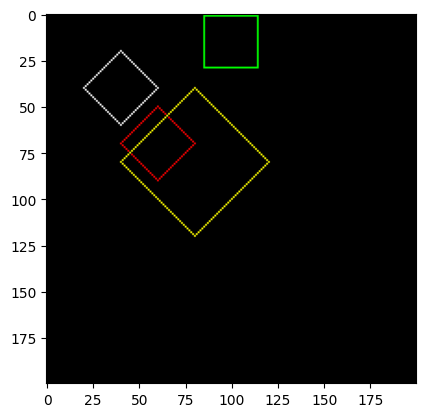

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import math

image = Image.new('RGB',(200, 200))

def Bresenham(x0,y0,x1,y1,fill):
  e=0
  is_steep = abs(y1-y0) > abs(x1-x0)
  if is_steep:
    temp = x0
    x0 = y0
    y0 = temp
    temp1 = x1
    x1 = y1
    y1 = temp1
  if x0 > x1:
   temp2 = x0
   x0 = x1
   x1 = temp2
   temp3 = y0
   y0 = y1
   y1 = temp3
  cur_y=y0
  for i in range(x0,x1+1):
    if is_steep:
      image.putpixel((cur_y,i),fill)
    else:
      image.putpixel((i,cur_y),fill)
    e=e+2*abs(y1-y0)
    if e > abs(x1-x0):
     e=e-2*abs(x1-x0)
     if y1>y0:
        cur_y+=1
     elif y1<y0:
       cur_y-=1
     else:
       cur_y = y0

def rotate_figure(points, pivot, angle):
    result = []
    translated_points = [[point[0] - pivot[0], point[1] - pivot[1]] for point in points]
    for point in translated_points:
        x = point[0] * math.cos(math.radians(angle)) - point[1] * math.sin(math.radians(angle))
        y = point[0] * math.sin(math.radians(angle)) + point[1] * math.cos(math.radians(angle))
        result.append([x, y])
    rotated_points = [[point[0] + pivot[0], point[1] + pivot[1]] for point in result]
    for i in range(0,len(rotated_points)-1):
      Bresenham(int(rotated_points[i][0]), int(rotated_points[i][1]), int(rotated_points[i+1][0]), int(rotated_points[i+1][1]),(0,255,0))
    Bresenham(int(rotated_points[len(rotated_points)-1][0]), int(rotated_points[len(rotated_points)-1][1]), int(rotated_points[0][0]), int(rotated_points[0][1]),(0,255,0))

def shift_figure(points,dx,dy):
  result = []
  for point in points:
        x = point[0] + dx
        y = point[1] + dy
        result.append([x, y])
  for i in range(0,len(result)-1):
    Bresenham(int(result[i][0]), int(result[i][1]), int(result[i+1][0]), int(result[i+1][1]),(255,0,0))
  Bresenham(int(result[len(result)-1][0]), int(result[len(result)-1][1]), int(result[0][0]), int(result[0][1]),(255,0,0))
def scale_figure(points,sx,sy):
  result = []
  for point in points:
        x = point[0] *sx
        y = point[1] *sy
        result.append([x, y])
  for i in range(0,len(result)-1):
    Bresenham(int(result[i][0]), int(result[i][1]), int(result[i+1][0]), int(result[i+1][1]),(255,255,0))
  Bresenham(int(result[len(result)-1][0]), int(result[len(result)-1][1]), int(result[0][0]), int(result[0][1]),(255,255,0))
if __name__ == '__main__':
    n = int(input("n: "))
    i=0
    points=[[0]*2 for i in range(0,n)]
    pivot = [0, 0]
    for i in range(0,n):
      x=int(input("x: "))
      y=int(input("y: "))
      points[i]=(x,y)
    pivot[0] = int(input("x0: "))
    pivot[1] = int(input("y0: "))
    angle = int(input("angle: "))
    dx = int(input("dx: "))
    dy = int(input("dy: "))
    sx = int(input("sx: "))
    sy = int(input("sy: "))
    for i in range(0,n-1):
      Bresenham(points[i][0], points[i][1], points[i+1][0], points[i+1][1],(255,255,255))
    Bresenham(points[n-1][0], points[n-1][1], points[0][0], points[0][1],(255,255,255))
    rotate_figure(points, pivot, angle)
    shift_figure(points,dx,dy)
    scale_figure(points,sx,sy)
    plt.imshow(image)